<h1 style="text-align:center"> Self Driving Car </h1>

<h3>Introduction</h3>

In this project, I will show how to program a self-driving car using <b>Deep Learning</b>, that is to say, steering of the car will not involve human intervention. <br> 
For that we are going to use Udacity's simulator which was built using <a href="https://unity3d.com/fr"> Unity</a>.<br>
For those interested, the link for the simulator is the following one : <a href="https://github.com/udacity/self-driving-car-sim">Car simulator </a>

<img src="sim_image.png" alt="Udacity simulator" width="75%" height="75%">

<h3>Importing libraries</h3>

In [1]:
import os # Command-line 
 
import pandas as pd # DataFrame manipulation
import numpy as np # Statistical tools

import scipy

# Plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline  

# Image processing
import cv2
from PIL import Image

# Train/Test set split using Scikit-Learn
from sklearn.model_selection import train_test_split

In [2]:
# Tensorflow
import tensorflow as tf

# Keras
from keras import layers
from keras.models import Sequential 
from keras.models import model_from_json
from keras.layers import Input, Dense, Lambda, Dropout, Conv2D, Flatten
from keras.models import Model
from keras.initializers import glorot_uniform



Using TensorFlow backend.


In [3]:
import keras

print(keras.__version__ )

2.0.9


<h3>Loading data generated</h3>

In [4]:
DATA_PATH = "car_data/"

def fetch_data(data_path=DATA_PATH):
    try:
        names = ['center', 'left', 'right', 
                 'steering angle', 'speed', 'brake', 'throttle'] 
        csv_path = os.path.join(DATA_PATH, "driving_log.csv")
        data = pd.read_csv(csv_path, names=names)
    except:
        print("Could not find csv file")
    
    return data


In [5]:
data = fetch_data()
data.head()

,center,left,right,steering angle,speed,brake,throttle
0,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,0.00,1.0,0,23.04924
1,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,0.00,1.0,0,23.63109
2,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.20,1.0,0,24.39499
3,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.35,1.0,0,24.92311
4,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,C:\Users\Melan\Desktop\car-sim\Car_project\car...,-0.55,1.0,0,25.55195


In [6]:
data.dtypes

center             object
left               object
right              object
steering angle    float64
speed             float64
brake               int64
throttle          float64
dtype: object

<h3>Preprocessing</h3>

The generated data comes from a Windows computer and this program will be used on a Linux computer to train the data. <br>
As such, the directory images of the center, left and right cameras need to be changed.

In [7]:
PATH_IMG = '/home/lamel/Documents/Car_project/self-driving/car_data/IMG/'

In [8]:
def center_camera_path_change(data):
    for center in data['center']:
        data['center'] = PATH_IMG + center[-34:]

def left_camera_path_change(data):
    for left in data['left']:
        data['left'] = PATH_IMG + left[-32:]
        
def right_camera_path_change(data):
    for right in data['right']:
        data['right'] = PATH_IMG + right[-33:]

In [9]:
center_camera_path_change(data)
left_camera_path_change(data)
right_camera_path_change(data)

In [10]:
data.head()

,center,left,right,steering angle,speed,brake,throttle
0,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,0.00,1.0,0,23.04924
1,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,0.00,1.0,0,23.63109
2,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,-0.20,1.0,0,24.39499
3,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,-0.35,1.0,0,24.92311
4,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,/home/lamel/Documents/Car_project/self-driving...,-0.55,1.0,0,25.55195


Quick sanity check that images have the expected file path:

In [11]:
print(data['center'][0])
print(data['left'][0])
print(data['right'][0])

/home/lamel/Documents/Car_project/self-driving/car_data/IMG/center_2017_12_18_11_09_29_195.jpg
/home/lamel/Documents/Car_project/self-driving/car_data/IMG/left_2017_12_18_11_09_29_195.jpg
/home/lamel/Documents/Car_project/self-driving/car_data/IMG/right_2017_12_18_11_09_29_195.jpg


<h3>Peek at the camera images</h3>

Let's take a look and verify that the images' path are indeed images and show them.

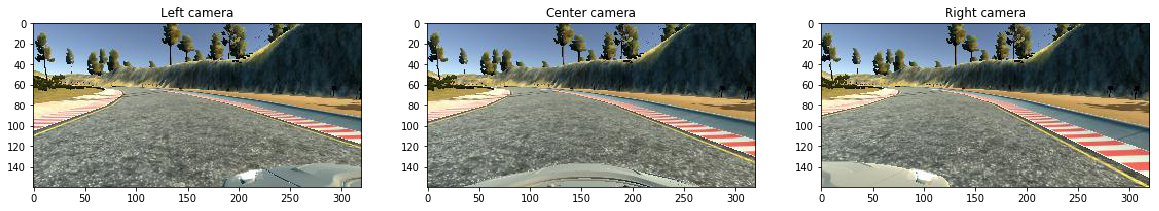

In [12]:
img_1 = data['center'][0]
img_center = Image.open(img_1)

img_2 = data['left'][1]
img_left = Image.open(img_2)

img_3 = data['right'][2]
img_right = Image.open(img_3)

plt.figure(1, figsize=(20, 12))
plt.subplot(332)
plt.title('Center camera')
plt.imshow(img_center)

plt.subplot(331)
plt.title('Left camera')
plt.imshow(img_left)

plt.subplot(333)
plt.title('Right camera')
plt.imshow(img_right)

plt.show()

<h3>Split the dataset</h3>

Now we will split the data into the X features and Y labels (steering angle) and
return the train and validation set

In [13]:
def split_train_validation(data, valid_ratio):
    # We store the camerage images as our input data
#     X = data[['center', 'left', 'right']].values
    X = data['center'].values
    # Steering angle is what we want to predict
    y = data['steering angle'].values
    
    # Split into training/test set 
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

In [14]:
X_train, X_valid, y_train, y_valid = split_train_validation(data, 0.2)
print("X_train.shape:", X_train.shape, "; X_valid.shape:", X_valid.shape)
print("y_train.shape:", y_train.shape, "; y_valid.shape:", y_valid.shape)

X_train.shape: (279,) ; X_valid.shape: (70,)
y_train.shape: (279,) ; y_valid.shape: (70,)


<h3>Extract images 4D tensor</h3>

We're going to convert the X_train & X_valid name paths to <i>ndarray</i>

In [15]:
def extract_4DTensor_images(X):
    X = np.array([cv2.imread(X[i]) 
                  for i in range(X.shape[0])
    ])
    
    return X

In [16]:
X_train = extract_4DTensor_images(X_train)
X_valid = extract_4DTensor_images(X_valid)

In [17]:
print("X_train.shape:", X_train.shape)
print("X_valid.shape:", X_valid.shape)

X_train.shape: (279, 160, 320, 3)
X_valid.shape: (70, 160, 320, 3)


In [18]:
# import scipy.ndimage

# img_size = scipy.ndimage.imread(img_1, mode='RGB')
# print("Size of an image is:", img_size.shape)

<h3>Building model</h3>

For the training, I will be using the one that NVidia depicted in their paper: <br> 
<b>End to End Learning for Self-Driving Cars</b> 25 April 2016 : <a href="https://arxiv.org/abs/1604.07316.pdf"> ArXiv paper</a>

In [19]:
# Helper function
def resize(image):
    import tensorflow as tf
    
    return tf.image.resize_images(image, [66, 200])

In [20]:
# def build_model():
#     model = Sequential()
    
#     # Resize data by using Lambda 
#     # Lambda Wraps arbitrary expression as a Layer object.
# #     model.add(Lambda(resize))
#     model.add(Lambda(resize, input_shape=(160, 320, 3)))
    
#     # Normalize images
#     model.add(Lambda(lambda x: (x/255.0) - 0.5))
    
#     # 1st CONV layer: (5x5) kernel, (2x2) strides, 24 filters, no pad
#     model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2), kernel_initializer='glorot_uniform'))
    
#     # 2nd CONV layer: (5x5) kernel, (2x2) strides, 36 filters, no pad
#     model.add(Conv2D(filters=36, kernel_size=(5, 5), strides=(2, 2), kernel_initializer='glorot_uniform'))
    
#     # 3rd CONV layer: (5x5) kernel, (2x2) strides, 48 filters, no pad
#     model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2), kernel_initializer='glorot_uniform'))
    
#     # 4th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
#     model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer='glorot_uniform'))
    
#     # 5th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
#     model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer='glorot_uniform'))
    
#     return model

In [21]:
def build_model(input_shape = (160, 320, 3)):
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    # Resize data by using Lambda 
    # Lambda Wraps arbitrary expression as a Layer object.
    X = Lambda(resize, name="resize")(X_input)   
    
    # 1st CONV layer: (5x5) kernel, (2x2) strides, 24 filters, no pad
    X = Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv1")(X)
    
    # 2nd CONV layer: (5x5) kernel, (2x2) strides, 36 filters, no pad
    X = Conv2D(filters=36, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv2")(X)
    
    # 3rd CONV layer: (5x5) kernel, (2x2) strides, 48 filters, no pad
    X = Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0), name="Conv3")(X)
    
    # 4th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
    X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0), name="Conv4")(X)
    
    # 5th CONV layer: (3x3) kernel, no stride (1, 1), 64 filters, no pad
    X = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), kernel_initializer=glorot_uniform(seed=0), name="Conv5")(X)
    
    # Flatten 
    X = Flatten()(X)
    
    # Fully Connected layer 1: 100 units, 
    # Activation: ELU (this helps alleviate the vanishing gradient problem) 
    X = Dense(100, activation='elu', name="fully_connected_1")(X)
    
    # Fully Connected layer 2: 50 units, Activation: ELU
    X = Dense(50, activation='elu', name="fully_connected_2")(X)
    
    # Fully Connected layer 3: 10 units, Activation: ELU
    X = Dense(10, activation='elu', name="fully_connected_3")(X)
    
    # Output layer
    X = Dense(1, name="output")(X)
    
    # Create model 
    model = Model(inputs = X_input, outputs = X, name='NVidia ConvNet')
    
    return model 

In [22]:
model = build_model()

We can take a peek at the overall structure we just made by calling the method <i>summary()</i>:

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 320, 3)       0         
_________________________________________________________________
resize (Lambda)              (None, 66, 200, 3)        0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 31, 98, 24)        1824      
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 47, 36)        21636     
_________________________________________________________________
Conv3 (Conv2D)               (None, 5, 22, 48)         43248     
_________________________________________________________________
Conv4 (Conv2D)               (None, 3, 20, 64)         27712     
_________________________________________________________________
Conv5 (Conv2D)               (None, 1, 18, 64)         36928     
__________

<u>Note</u>: <br>
When we transition from the last convolutional layer (<b>Conv5</b>) to the <b>Flatten</b> operation, there is 1152 units and not 1164 as depicted in the paper. 

<h3>Compile model</h3>

We can now compile the model to configure the learning process. <br>
The arguments of <i>compile()</i> has to be chosen wisely.
The <i>compile()</i> method receives three arguments:
<ul>
    <li>An <u>optimizer</u>: We will chose Adam (Adaptive Momentum) </li>
    <li>A <u>loss function</u>: As we predict a steering angle, the most efficient one for our problem is definitely the mean squared error (mse)</li>
    <li>A list of <u>metrics</u>: A metric is a function that is used to judge the performance of your model. We don't necessarily need one here.</li>

</ul>

In [24]:
model.compile(optimizer='adam', \
              loss='mean_squared_error')

<h3>Fit the model</h3>

We can at least train the model ! <br>
<i>fit()</i>: Trains the model for a fixed number of epochs (iterations on a dataset).

In [25]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=20)

Train on 279 samples, validate on 70 samples
Epoch 1/10
279/279 [==============================] - 3s 12ms/step - loss: 640.2320 - val_loss: 8.1229
Epoch 2/10
279/279 [==============================] - 2s 8ms/step - loss: 4.5848 - val_loss: 2.8893
Epoch 3/10
279/279 [==============================] - 2s 9ms/step - loss: 2.8571 - val_loss: 2.8745
Epoch 4/10
279/279 [==============================] - 2s 8ms/step - loss: 2.8374 - val_loss: 2.8502
Epoch 5/10
279/279 [==============================] - 2s 8ms/step - loss: 2.8108 - val_loss: 2.8211
Epoch 6/10
279/279 [==============================] - 2s 8ms/step - loss: 2.7802 - val_loss: 2.7889
Epoch 7/10
279/279 [==============================] - 2s 8ms/step - loss: 2.7470 - val_loss: 2.7540
Epoch 8/10
279/279 [==============================] - 2s 7ms/step - loss: 2.7112 - val_loss: 2.7170
Epoch 9/10
279/279 [==============================] - 2s 7ms/step - loss: 2.6735 - val_loss: 2.6781
Epoch 10/10
279/279 [==============================]

<h3>Saving model to disk</h3>

Keras provides the ability to
describe any model using JSON format with a <b>to_json()</b> function. This can be saved to file
and later loaded via the model <b>from_json()</b> function that will create a new model from the
JSON specification. <br>

The weights are saved directly from the model using the <b>save_weights()</b> function and
later loaded using the symmetrical <b>load_weights()</b> function.

In [26]:
# Serialize model to JSON

model_json = model.to_json()
with open("model_nvidia.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialize weights to HDF5

model.save_weights("model_nvidia.h5")
print("Saved model to disk")

Saved model to disk
